# Video Game Sales Through December 2016
## by Christopher James

## Investigation Overview

The goal of this presentation is to identify the features that correlate with higher game sales.

## Dataset Overview

This dataset contains sales statistics on video games released from 1980 through 2016. These statistics include sales numbers for North America, the European Union, Japan, and all others, the platform they were released for, the publisher, the content rating, and others. It also contains metacritic ratings and user ratings from games released starting in 1999. It has a total of 16,712 video games.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016_master.csv')

In [4]:
# Create seperate dataframes by filtering out all regional sales for games that were not available in their respected countries.
na_sales = df.query('NA_Sales > 0')
eu_sales = df.query('EU_Sales > 0')
jp_sales = df.query('JP_Sales > 0')
other_sales = df.query('Other_Sales > 0')

In [5]:
# Remove the rating 'K-A', as that data is not available for this set. Also removing 'RP' and 'AO'.


na_noka = na_sales.query('Rating != ["K-A", "AO", "RP"]')
eu_noka = eu_sales.query('Rating != ["K-A", "AO", "RP"]')
jp_noka = jp_sales.query('Rating != ["K-A", "AO", "RP"]')
other_noka = other_sales.query('Rating != ["K-A", "AO", "RP"]')

In [6]:
# Remove systems that were in retail before content rating system came out.
na_noka_sys = na_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')
eu_noka_sys = eu_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')
jp_noka_sys = jp_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600","WS", "NG", "TG16", "3DO", "GG", "PCFX"]')
other_noka_sys = other_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')

##  Relationship Between Sales Numbers and the Content Rating of Games

In North America and the European Union, rated 'M' games have the highest mean sales, while 'EC' has the lowest. In Japan, the highest is 'E', while the lowest is 'M'. In all other regions, the highest is 'M', while the lowest is 'EC'.

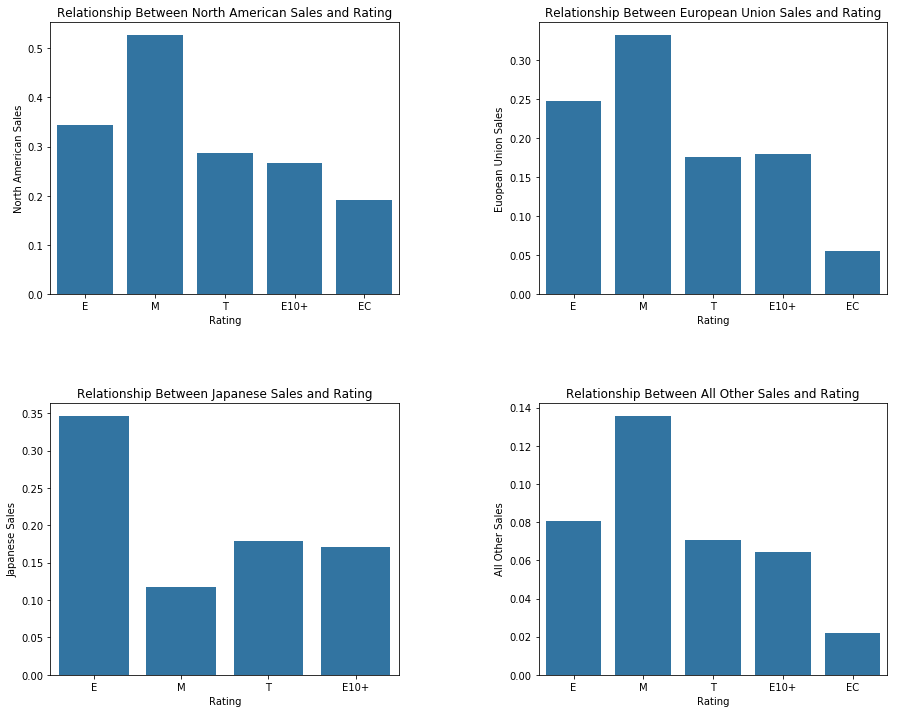

In [6]:
fig, axes = plt.subplots(2, 2, figsize = [15, 12])
axes = axes.flatten()
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.4)

# Plot relationship between North American Sales numbers and rating.
ax1 = sb.barplot(data = na_noka, x = 'Rating', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Rating')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and rating.
ax2 = sb.barplot(data = eu_noka, x = 'Rating', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Rating')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and rating.
ax3 = sb.barplot(data = jp_noka, x = 'Rating', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Rating')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and rating.
ax4 = sb.barplot(data = other_noka, x = 'Rating', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Rating')
ax4.set_ylabel('All Other Sales');

## Relationship Between Platform and Sales

In North America, the two platforms with the highest mean sales are the NES and the GB, both Nintendo systems, while the two lowest are the psp and the psv, both Sony handhelds. In the European Union, the two highest are the GB and the GEN, while the two lowest are the 2600 and the GC. In Japan, the two highest are the NES and the GB, while the two lowest are the XONE and the PCFX. In all other regions, the two highest are the GB and the PS4, while the two lowest are the XB and the 2600.

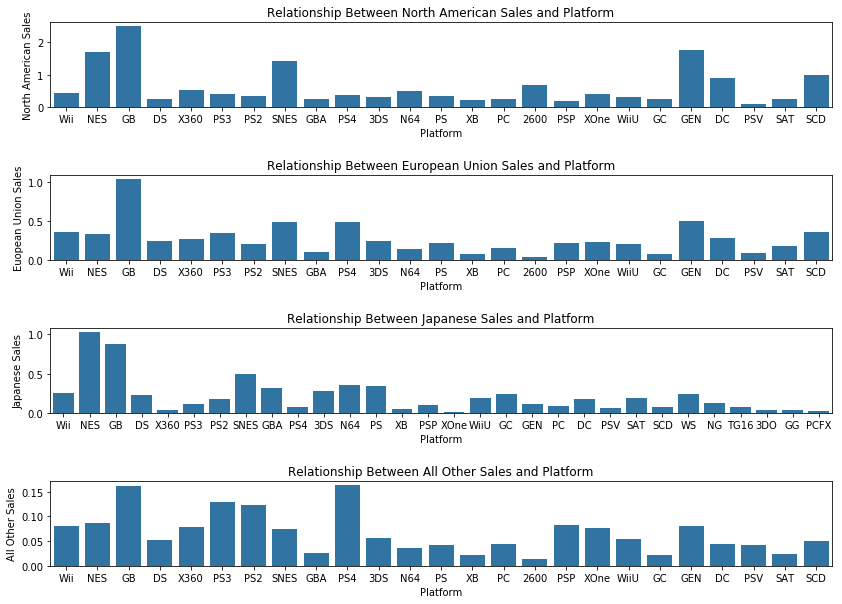

In [12]:
fig, axes = plt.subplots(4, 1, figsize = [14, 10])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.8)

# Plot relationship between North American Sales numbers and Platform.
ax1 = sb.barplot(data = na_sales, x = 'Platform', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Platform')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and platform.
ax2 = sb.barplot(data = eu_sales, x = 'Platform', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Platform')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and platform.
ax3 = sb.barplot(data = jp_sales, x = 'Platform', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Platform')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and platform.
ax4 = sb.barplot(data = other_sales, x = 'Platform', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Platform')
ax4.set_ylabel('All Other Sales');

##  Relationship Between Sales and Genre

In North America, as well as the European Union, the two genres with the highest mean sales are platform and shooter, while the two with the lowest are adventure and strategy. In Japan, the two highest are platform and puzzle, while the two lowest are shooter and adventure. In all other regions, the two highest are shooter and action, while the two lowest are adventure and strategy. 

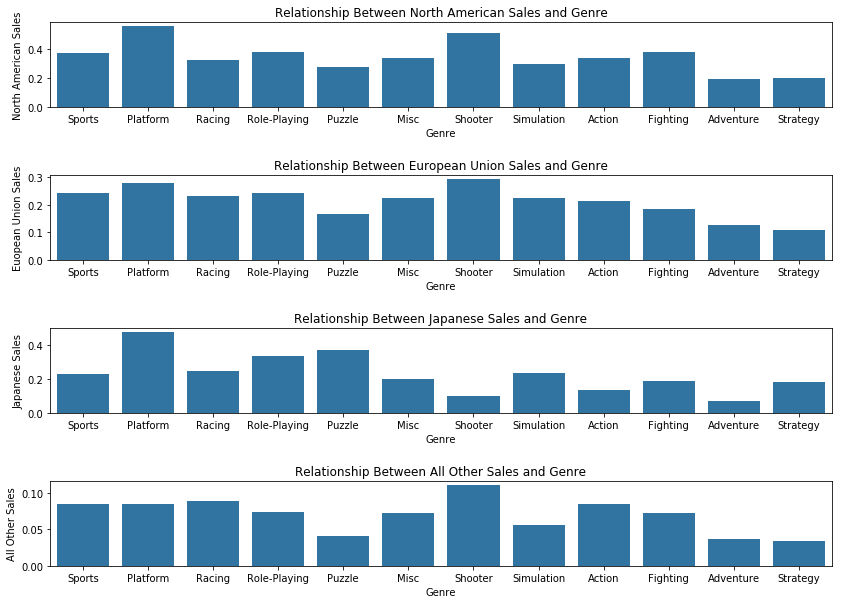

In [13]:
fig, axes = plt.subplots(4, 1, figsize = [14, 10])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.8)

# Plot relationship between North American Sales numbers and genre.
ax1 = sb.barplot(data = na_sales, x = 'Genre', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Genre')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and genre.
ax2 = sb.barplot(data = eu_sales, x = 'Genre', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Genre')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and genre.
ax3 = sb.barplot(data = jp_sales, x = 'Genre', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Genre')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and genre.
ax4 = sb.barplot(data = other_sales, x = 'Genre', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Genre')
ax4.set_ylabel('All Other Sales');

## Relationship Between Rating, Platform and Sales Numbers

As shown below, the Nintendo systems, which are the GBA, the GC, both Wii models, and both ds models, have the highest mean sales in games geared towards younger players, with the ratings 'EC', 'E' and 'E10'. The Microsoft systems, which are the 3 Xbox models, along with the Sony systems, which are the 4 playstation models and the 2 portable playstation models, have higher mean sales numbers in games geared towards older players, with the ratings 'T' and 'M'. These findings are true in all of the regions.

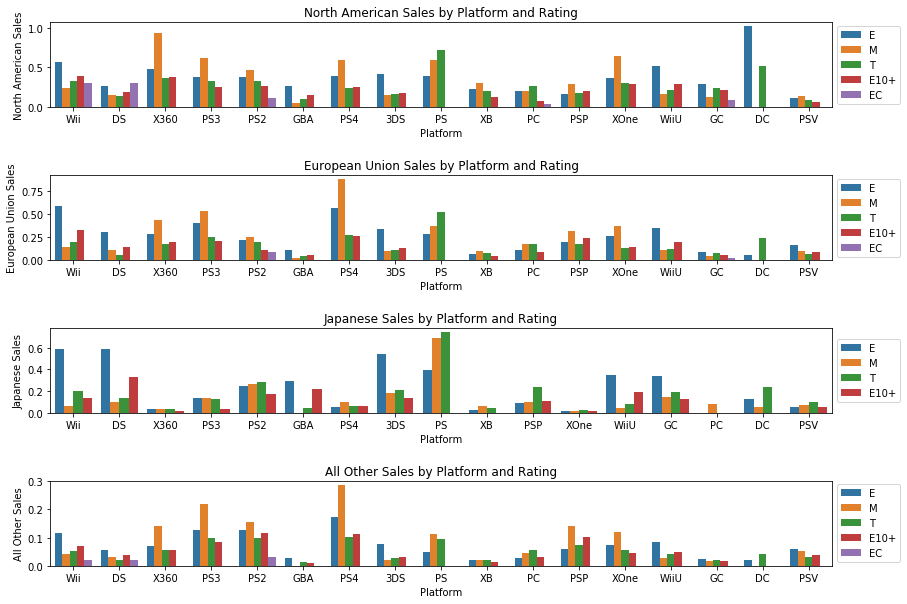

In [18]:
# North American sales by platform and rating
fig, axes = plt.subplots(4, 1, figsize = [14, 10])
plt.subplots_adjust(hspace = 0.8)

ax1 = sb.barplot(data = na_noka_sys, x = 'Platform', y = 'NA_Sales', hue = 'Rating', ci = None, ax = axes[0])
ax1.set_title('North American Sales by Platform and Rating')
ax1.set_ylabel('North American Sales')
ax1.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# European Union sales by platform and rating
ax2 = sb.barplot(data = eu_noka_sys, x = 'Platform', y = 'EU_Sales', hue = 'Rating', ci = None, ax = axes[1])
ax2.set_title('European Union Sales by Platform and Rating')
ax2.set_ylabel('European Union Sales')
ax2.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# Japanese sales by platform and rating
ax3 = sb.barplot(data = jp_noka_sys, x = 'Platform', y = 'JP_Sales', hue = 'Rating', ci = None, ax = axes[2])
ax3.set_title('Japanese Sales by Platform and Rating')
ax3.set_ylabel('Japanese Sales')
ax3.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# All other sales by platform and rating
ax4 = sb.barplot(data = other_noka_sys, x = 'Platform', y = 'Other_Sales', hue = 'Rating', ci = None, ax = axes[3])
ax4.set_title('All Other Sales by Platform and Rating')
ax4.set_ylabel('All Other Sales')
ax4.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);

## Relationship Between Rating, Genre, and Sales Numbers

In North America, as well as the European Union and all other regions, the top rating for the role-playing, shooter, and action genres is 'M'. In Japan, this rating is much less prevailment, while the 'E' rating dominates.

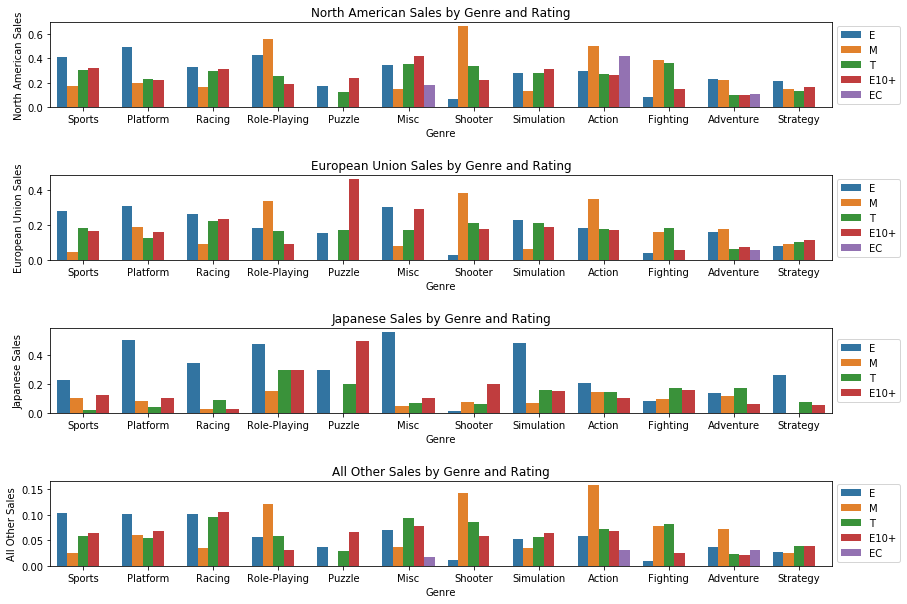

In [19]:
# North American sales by genre and rating
fig, axes = plt.subplots(4, 1, figsize = [14, 10])
plt.subplots_adjust(hspace = 0.8)

ax1 = sb.barplot(data = na_noka, x = 'Genre', y = 'NA_Sales', hue = 'Rating', ci = None, ax = axes[0])
ax1.set_title('North American Sales by Genre and Rating')
ax1.set_ylabel('North American Sales')
ax1.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# European Union sales by genre and rating
ax2 = sb.barplot(data = eu_noka, x = 'Genre', y = 'EU_Sales', hue = 'Rating', ci = None, ax = axes[1])
ax2.set_title('European Union Sales by Genre and Rating')
ax2.set_ylabel('European Union Sales')
ax2.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# Japanese sales by genre and rating
ax3 = sb.barplot(data = jp_noka, x = 'Genre', y = 'JP_Sales', hue = 'Rating', ci = None, ax = axes[2])
ax3.set_title('Japanese Sales by Genre and Rating')
ax3.set_ylabel('Japanese Sales')
ax3.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# All other sales by genre and rating
ax4 = sb.barplot(data = other_noka, x = 'Genre', y = 'Other_Sales', hue = 'Rating', ci = None, ax = axes[3])
ax4.set_title('All Other Sales by Genre and Rating')
ax4.set_ylabel('All Other Sales')
ax4.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);